# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df['data_ref'] = pd.to_datetime(df['data_ref'])


In [4]:
var_qualitativas = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
var_qualitativas.pop(0)

'data_ref'

<Figure size 1500x800 with 0 Axes>

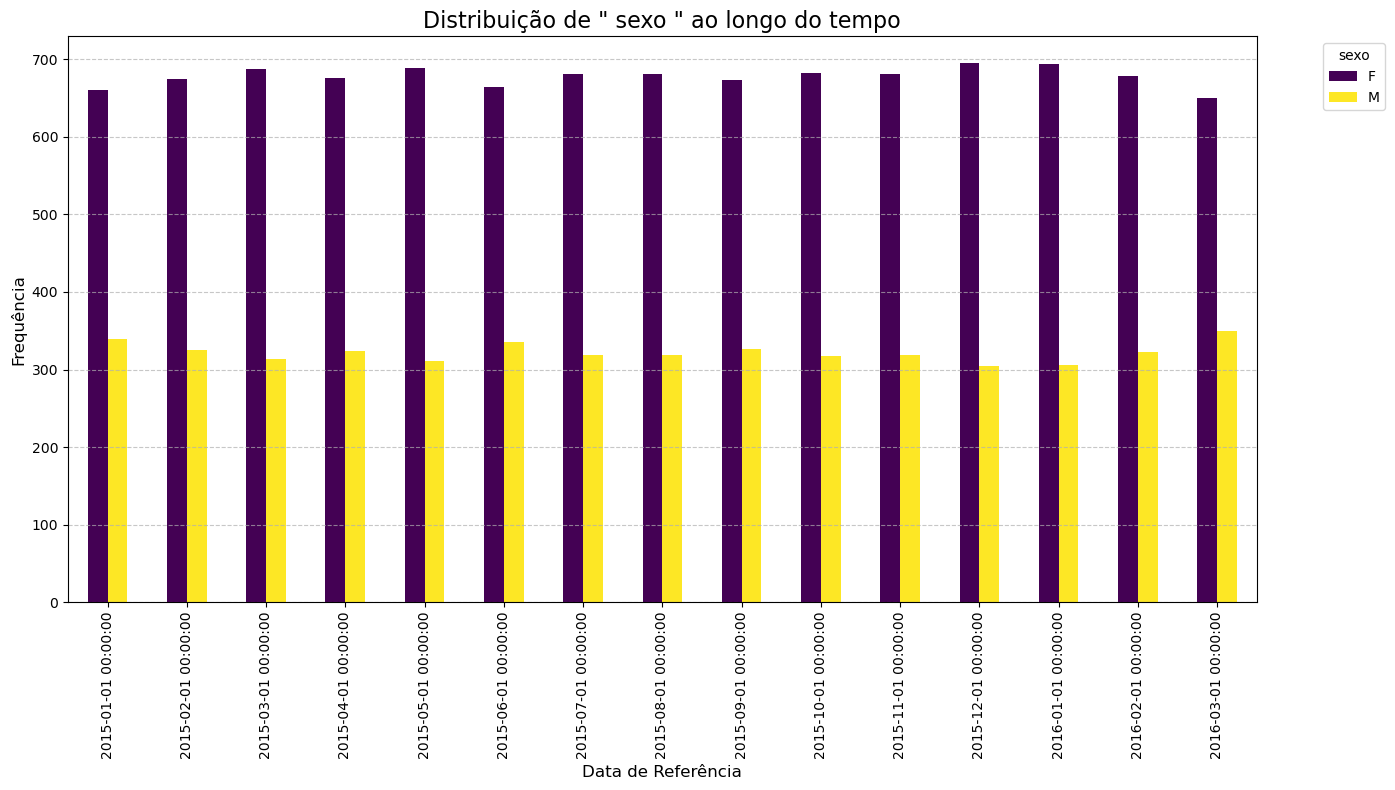

<Figure size 1500x800 with 0 Axes>

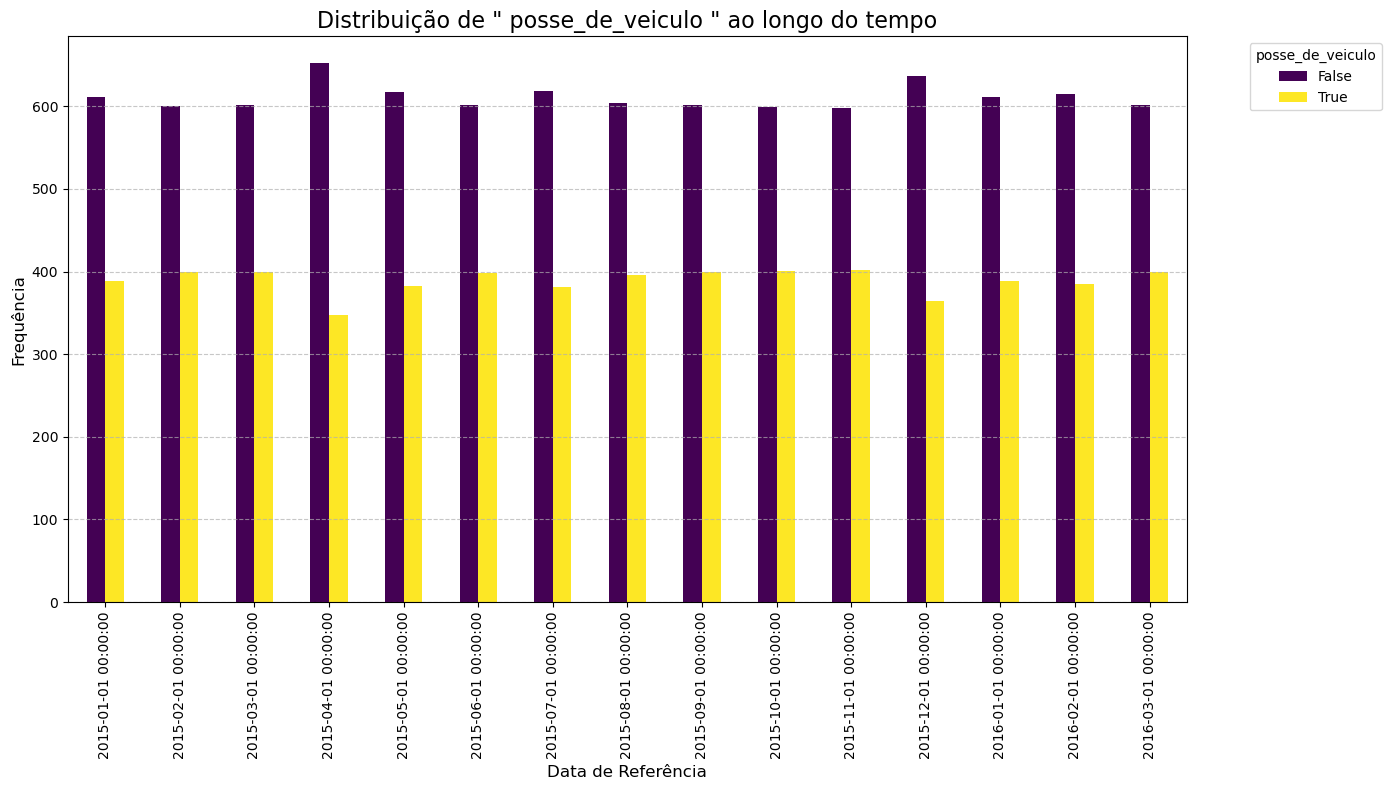

<Figure size 1500x800 with 0 Axes>

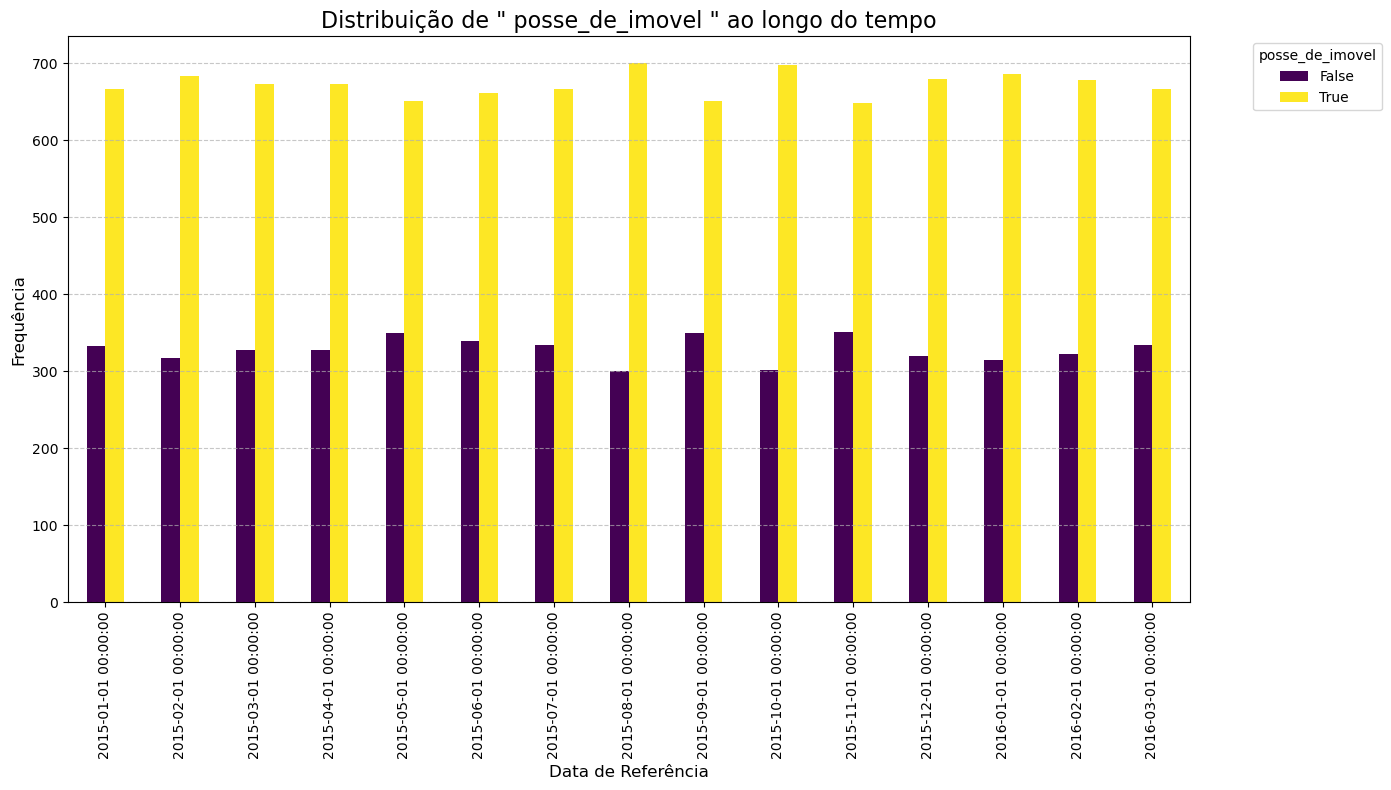

<Figure size 1500x800 with 0 Axes>

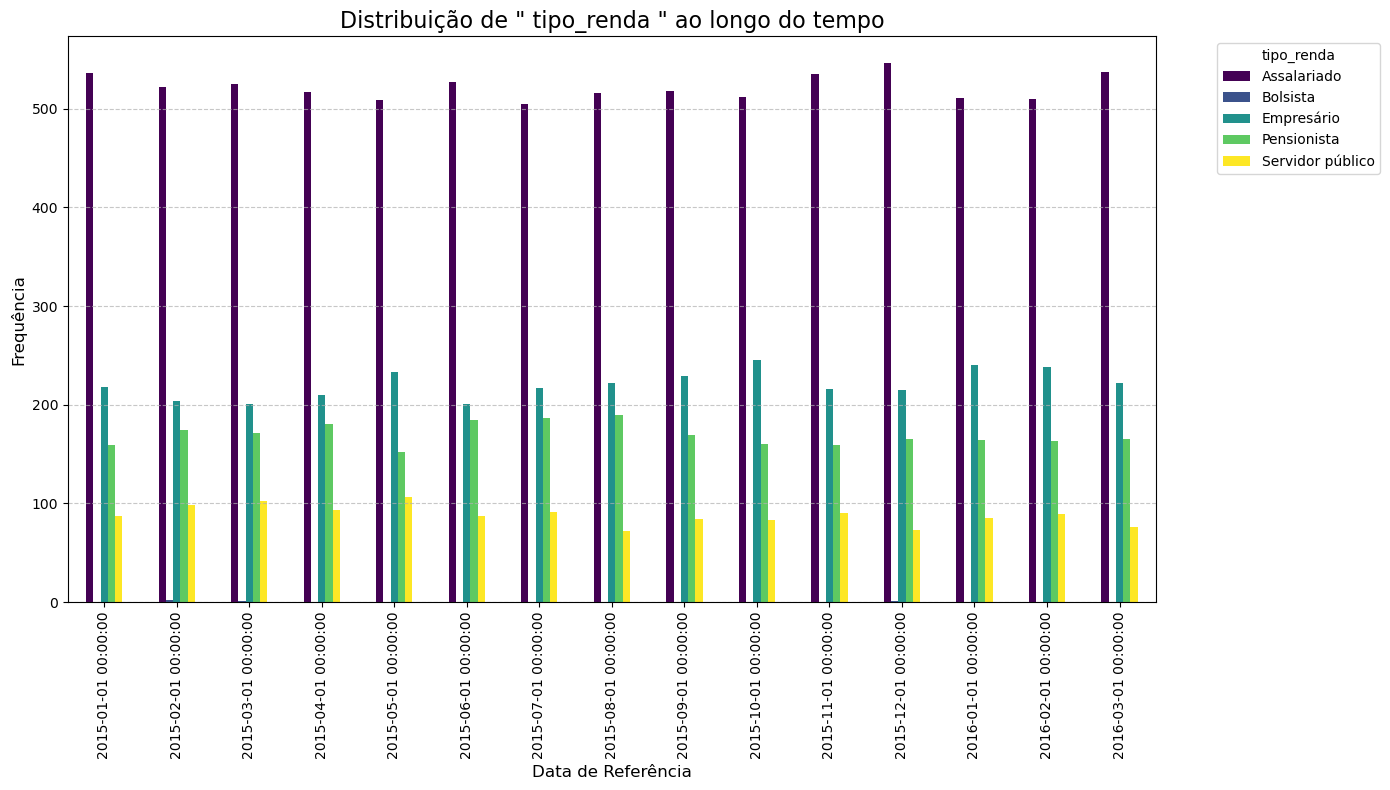

<Figure size 1500x800 with 0 Axes>

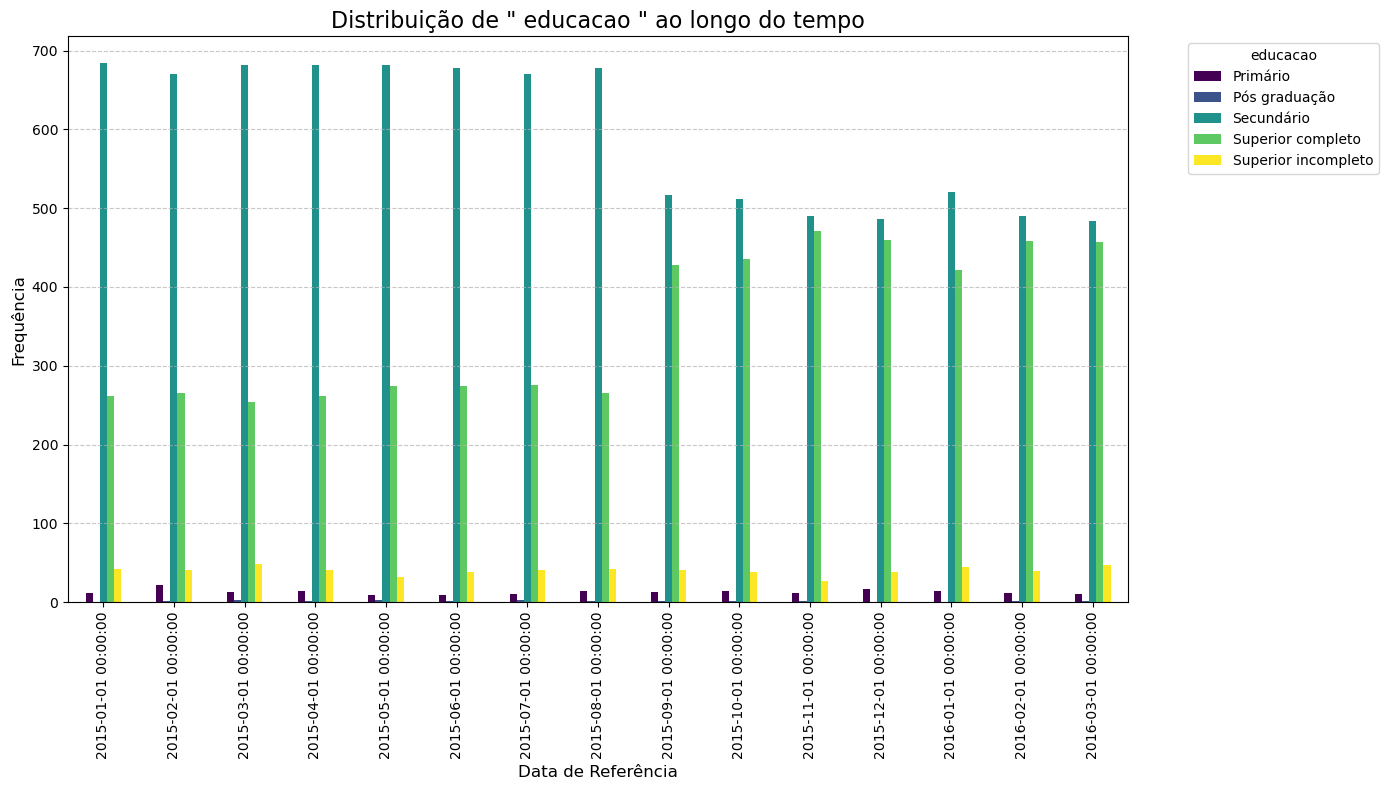

<Figure size 1500x800 with 0 Axes>

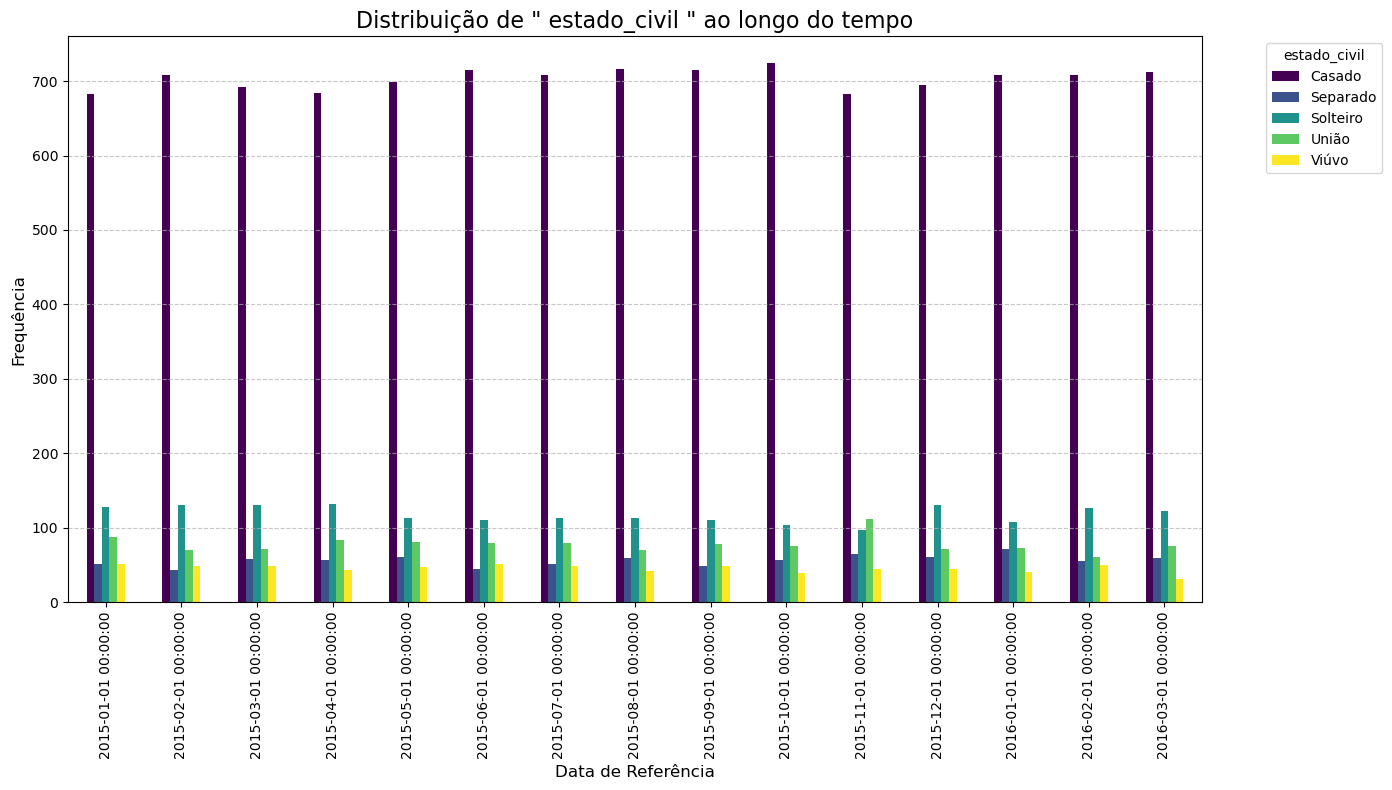

<Figure size 1500x800 with 0 Axes>

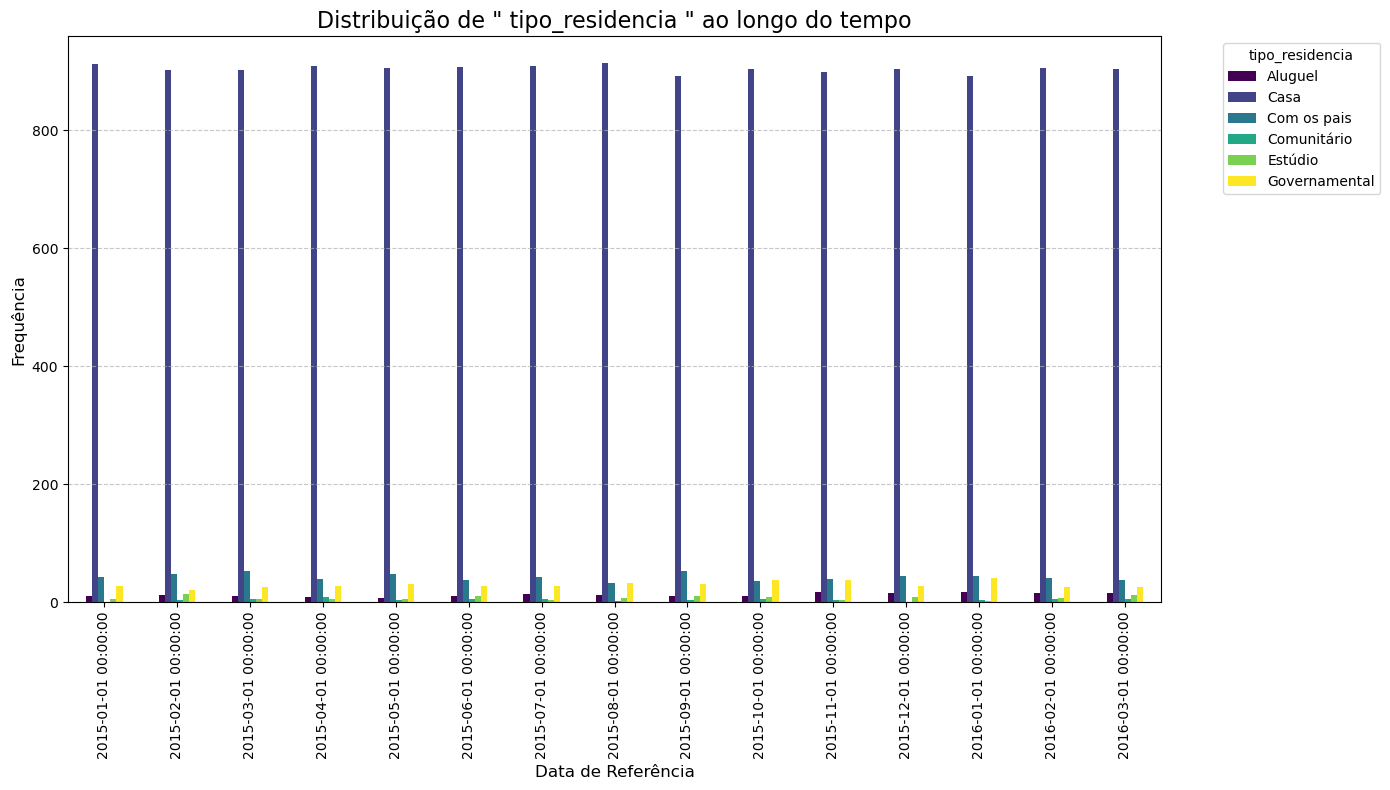

<Figure size 1500x800 with 0 Axes>

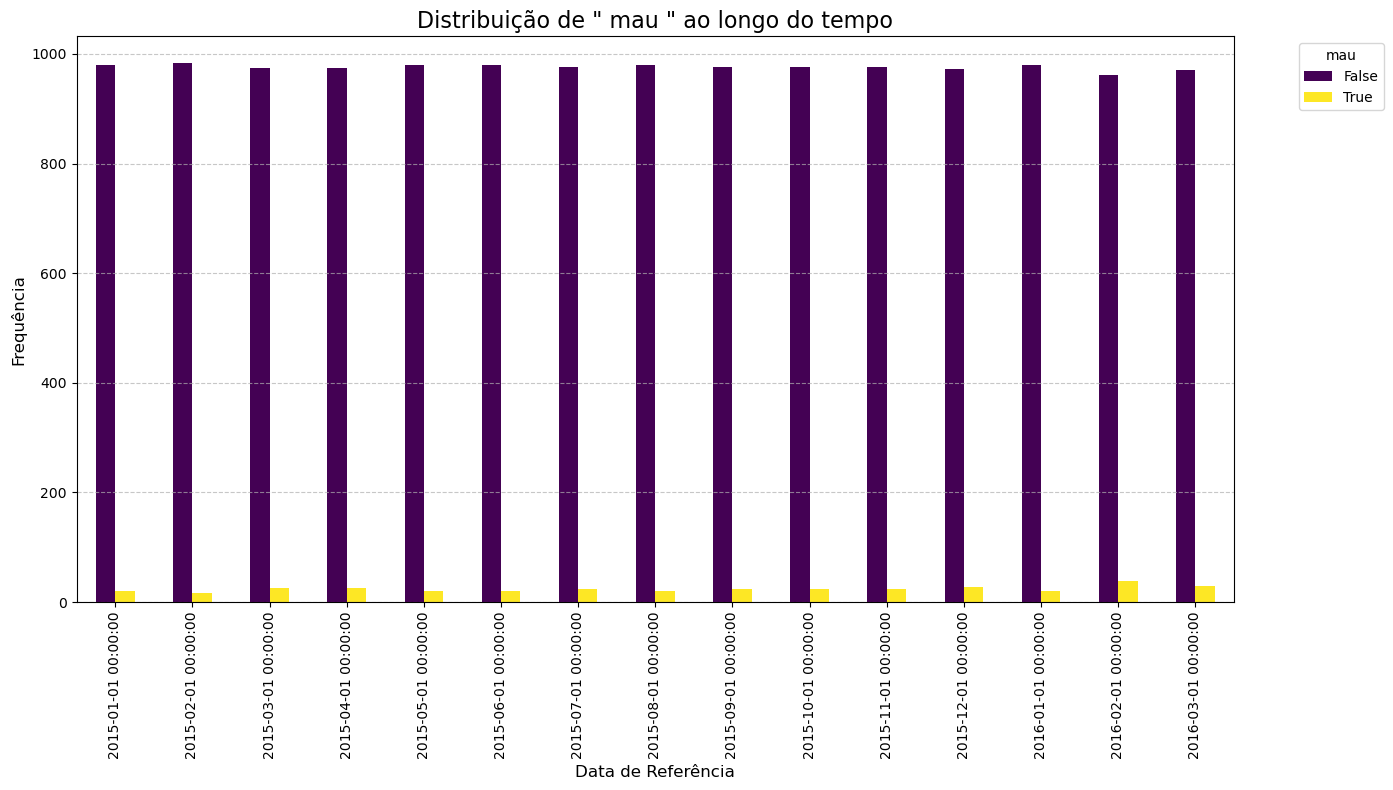

In [16]:

for var in var_qualitativas:
    distribuicao = df.groupby(['data_ref', var]).size().unstack()
    
    plt.figure(figsize=(15, 8))
    distribuicao.plot(kind = 'bar', figsize=(14, 8), colormap = 'viridis')
    plt.title(f'Distribuição de " {var} " ao longo do tempo', fontsize = 16)
    plt.xlabel('Data de Referência', fontsize = 12)
    plt.ylabel('Frequência', fontsize = 12)
    plt.legend(title = var, bbox_to_anchor = (1.05, 1), loc = 'upper left')
    plt.tight_layout()
    plt.grid(axis= 'y', linestyle='--', alpha=0.7)
    plt.show()

Das variaveis a que mostrou maior alteração foi a de nivel de escolaridade onde a proporção de pessoas com ensino superior e de secundario completo ficou mais proxima de um a partir de setembro de 2015. Possivelmente pelo aumento de pessoas com ensino superior.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

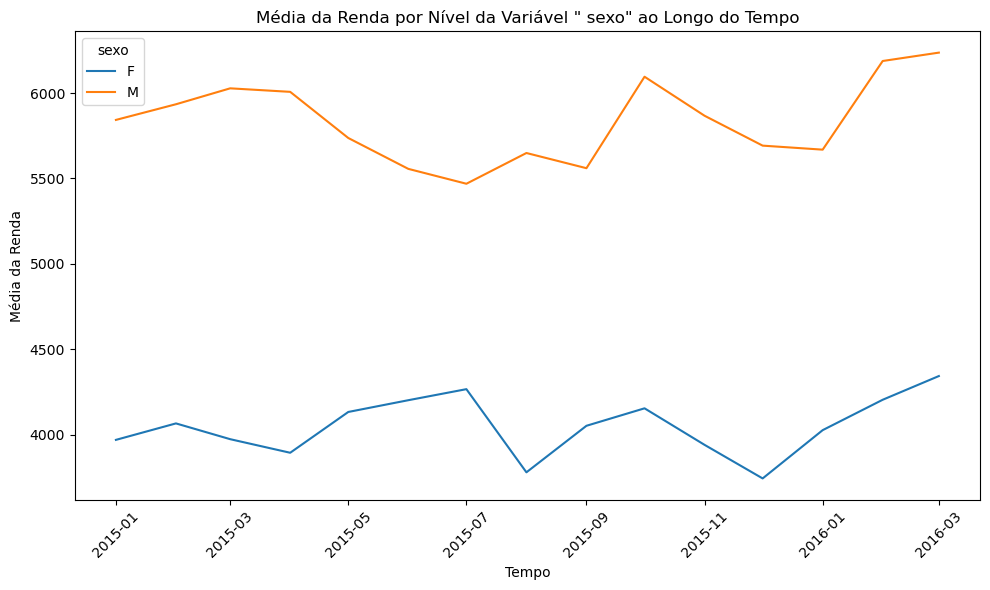

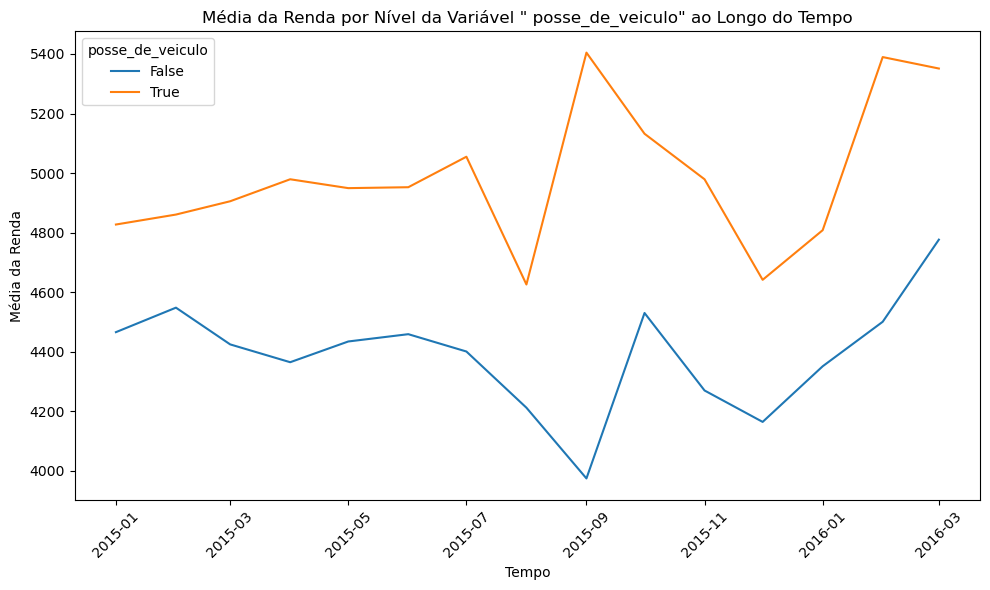

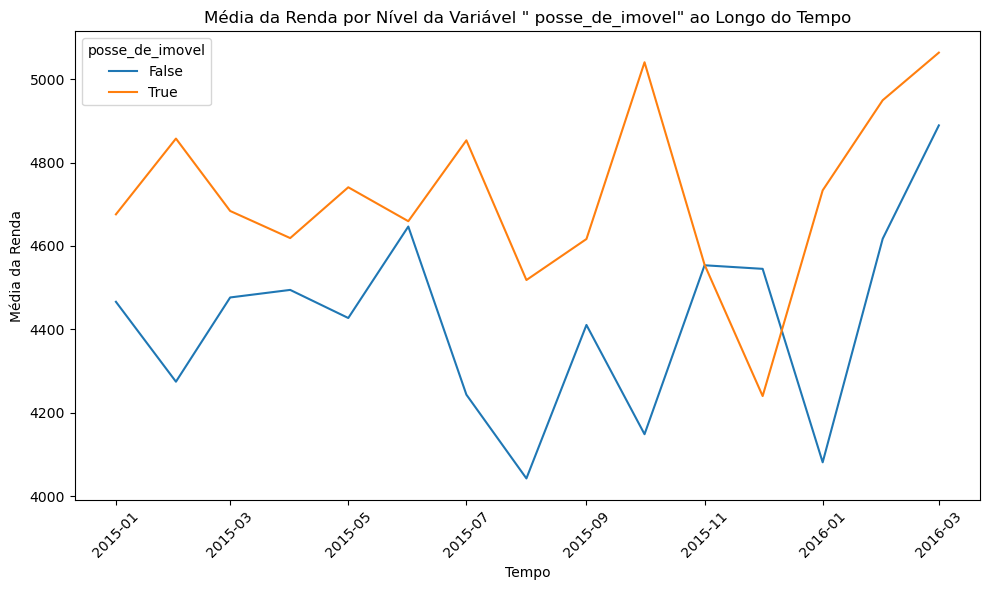

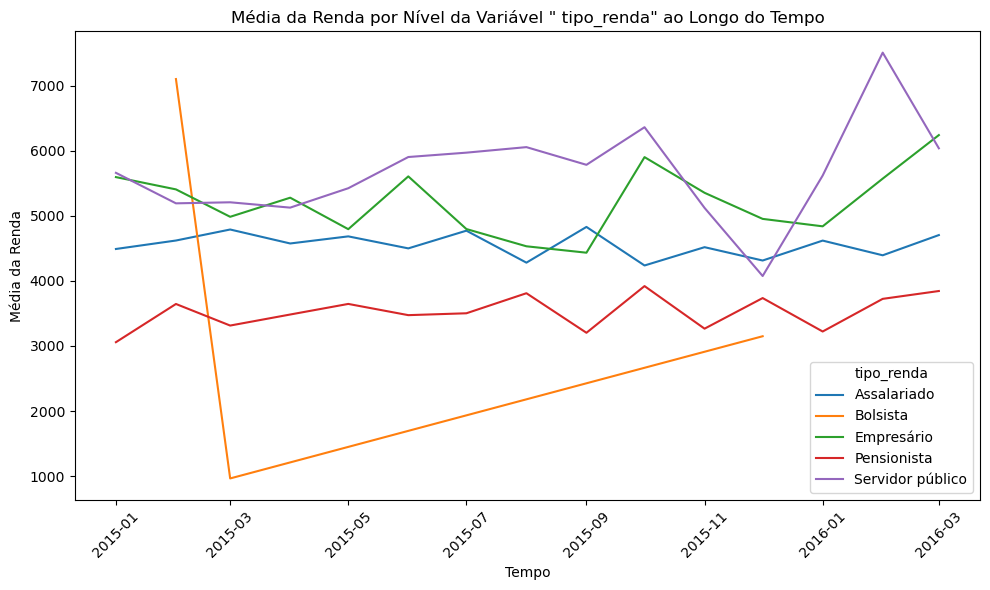

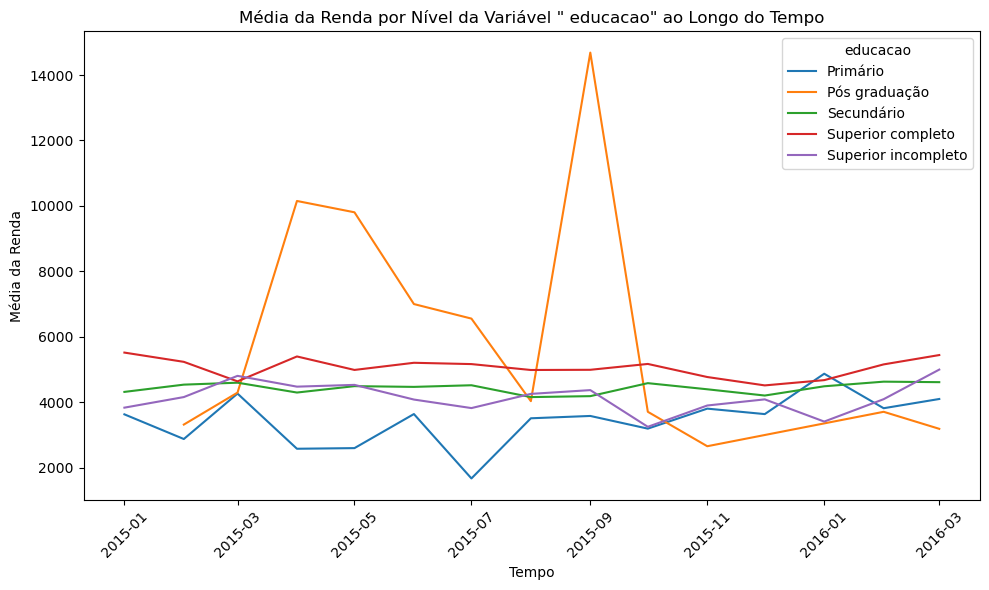

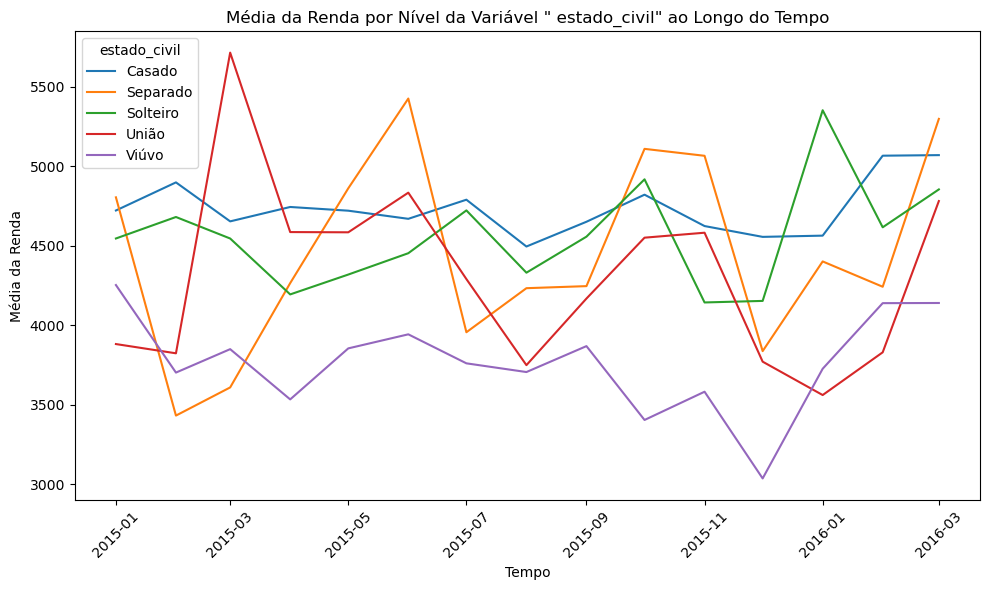

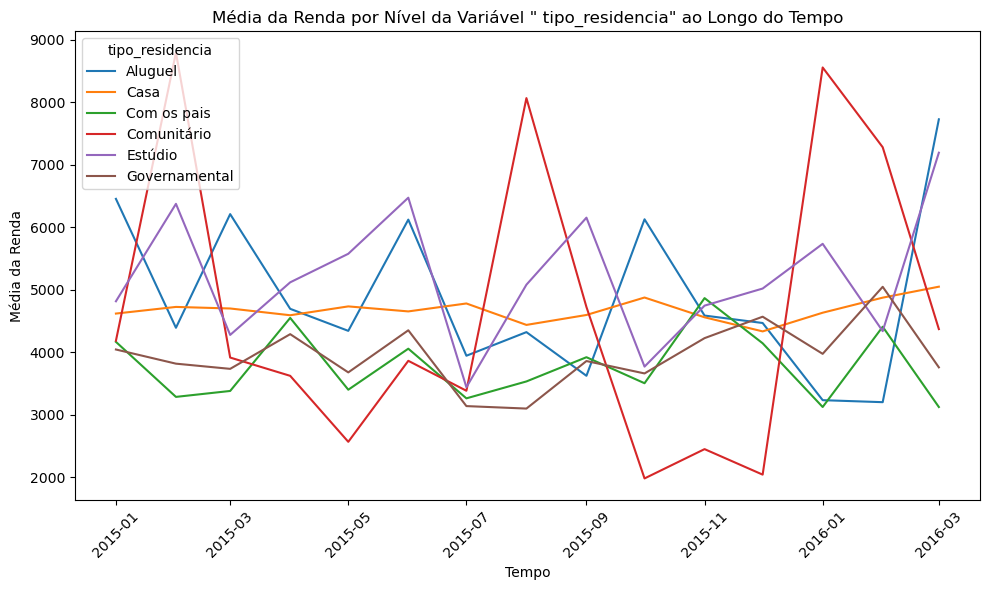

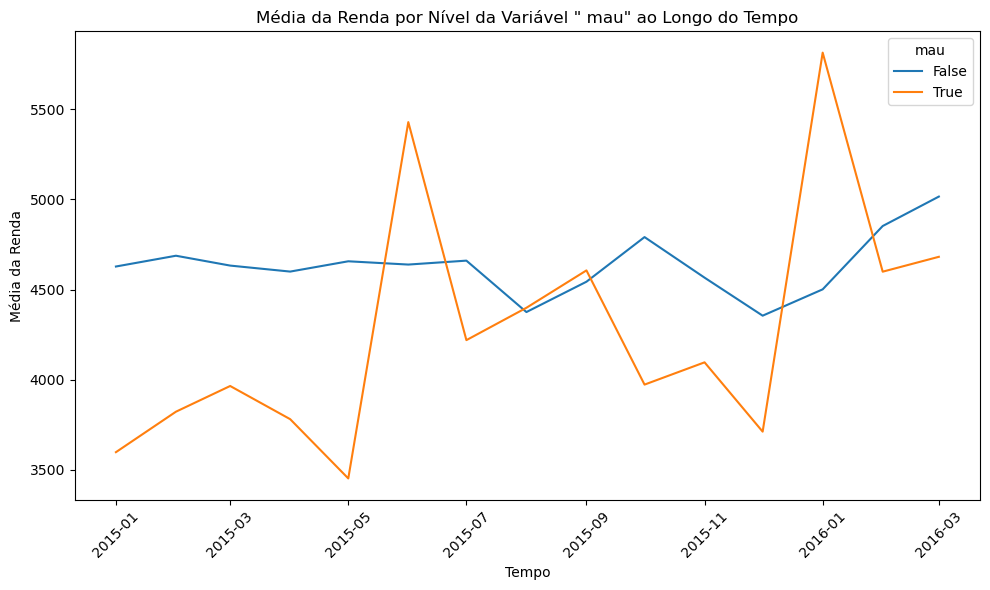

In [20]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

for var in var_qualitativas:
    media = df.groupby([var, 'data_ref'])['renda'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data = media, x = 'data_ref', y = 'renda', hue=var)
    plt.title(f'Média da Renda por Nível da Variável " {var}" ao Longo do Tempo')
    plt.ylabel('Média da Renda')
    plt.xlabel('Tempo')
    plt.legend(title = var)
    plt.xticks(rotation =  45)
    plt.tight_layout()
    plt.show()

As variaveis que possuem menor estabilidade de acordo com os gráficos seriam as de tipo_residencia, estado_civil e educação, dependendo do tipo de modelagem a ser utilizada essas grandes variações podem dificultar a modelagem, algumas delas podem sim ser relevantes para uma predição de inadimplencia, sendo necessario avaliar o quao grande seria o impacto na modelagem.